# Seaborn Data Visualization Tutorial - NHL Statistics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon':True})
sns.set(font_scale = 1.5)

import matplotlib.pyplot as plt
import re
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Import Skaters DataFrame
### Perform some select data cleaning

In [2]:
skaters = pd.read_csv('skaters.csv')
skaters = skaters[skaters.situation == 'all']
skaters.set_index('name', inplace = True)

In [3]:
skaters

,playerid,season,team,position,situation,games_played,icetime,shifts,gamescore,onice_xgoalspercentage,...,office_f_xgoals,office_a_xgoals,office_f_shotattempts,office_a_shotattempts,xgoalsforaftershifts,xgoalsagainstaftershifts,corsiforaftershifts,corsiagainstaftershifts,fenwickforaftershifts,fenwickagainstaftershifts
name,,,,,,,,,,,,,,,,,,,,,
Jayson Megna,8477126,2019,COL,C,all,8,3222.0,79.0,-0.36,0.48,...,16.56,23.41,391.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0
Vince Dunn,8478407,2019,STL,D,all,71,68646.0,1525.0,39.47,0.56,...,139.43,150.14,2591.0,2842.0,0.0,0.0,0.0,0.0,0.0,0.0
Alexandre Carrier,8478851,2019,NSH,D,all,3,1935.0,44.0,1.20,0.74,...,5.28,9.67,130.0,176.0,0.0,0.0,0.0,0.0,0.0,0.0
Dante Fabbro,8479371,2019,NSH,D,all,64,73043.0,1497.0,18.65,0.45,...,136.03,131.19,2775.0,2587.0,0.0,0.0,0.0,0.0,0.0,0.0
Matt Duchene,8475168,2019,NSH,C,all,66,66811.0,1339.0,51.78,0.58,...,121.87,143.42,2653.0,2955.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Josh Morrissey,8477504,2019,WPG,D,all,65,88775.0,1755.0,24.45,0.47,...,117.75,126.32,2268.0,2321.0,0.0,0.0,0.0,0.0,0.0,0.0
Marcus Foligno,8475220,2019,MIN,L,all,59,51581.0,1116.0,28.95,0.47,...,124.95,121.35,2576.0,2495.0,0.0,0.0,0.0,0.0,0.0,0.0
Alex DeBrincat,8479337,2019,CHI,L,all,70,73353.0,1365.0,45.61,0.56,...,129.10,166.14,2615.0,3161.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_cols = skaters.columns.tolist()
cols = [x.lower().replace('i_f_', "") for x in df_cols]
skaters.columns = cols

In [6]:
teams = skaters.team.unique()

In [7]:
central = skaters[(skaters.team == 'CHI') | (skaters.team == 'STL') | (skaters.team == 'COL') | (skaters.team == 'DAL') | (skaters.team == 'WPG') | (skaters.team == 'MIN') | (skaters.team == 'NSH')]

In [10]:
central.to_csv('central.csv')

# Scatter Plots

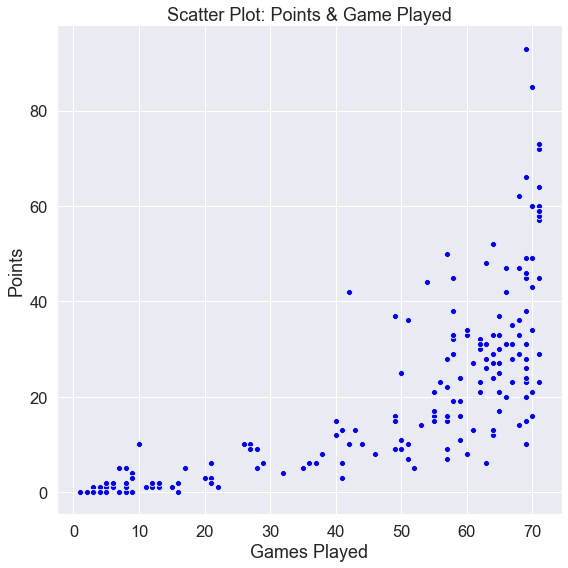

In [13]:
g = sns.relplot(data = central, x = 'games_played', y = 'points', color = 'blue', height = 8)
g.set(xlabel = 'Games Played', ylabel = 'Points', title = 'Scatter Plot: Points & Game Played')
plt.tight_layout()

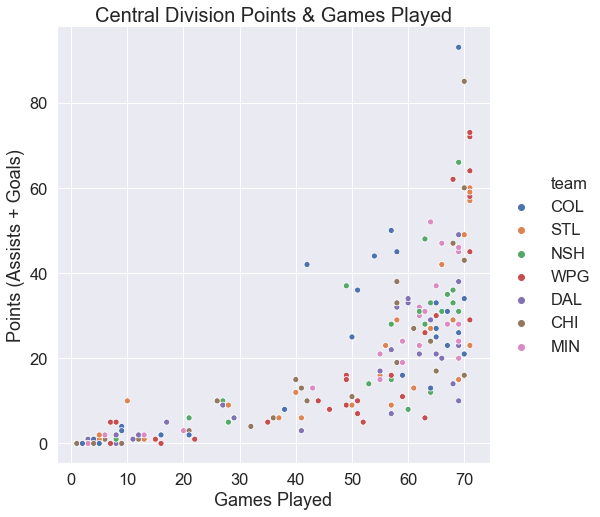

In [14]:
g = sns.relplot(data = central, x = 'games_played', y = 'points', hue = 'team')
g.fig.set_size_inches(7,7)
leg = g._legend
leg.set_bbox_to_anchor([1.2, 0.5])
g.fig.suptitle('Central Division Points & Games Played', y = 1.02, x = 0.55, size = 20)
g.set(xlabel = 'Games Played', ylabel = 'Points (Assists + Goals)')
plt.tight_layout()

In [15]:
central2 = central.copy()
central2.position = central2.position.replace(['C', 'L', 'R'], 'F')

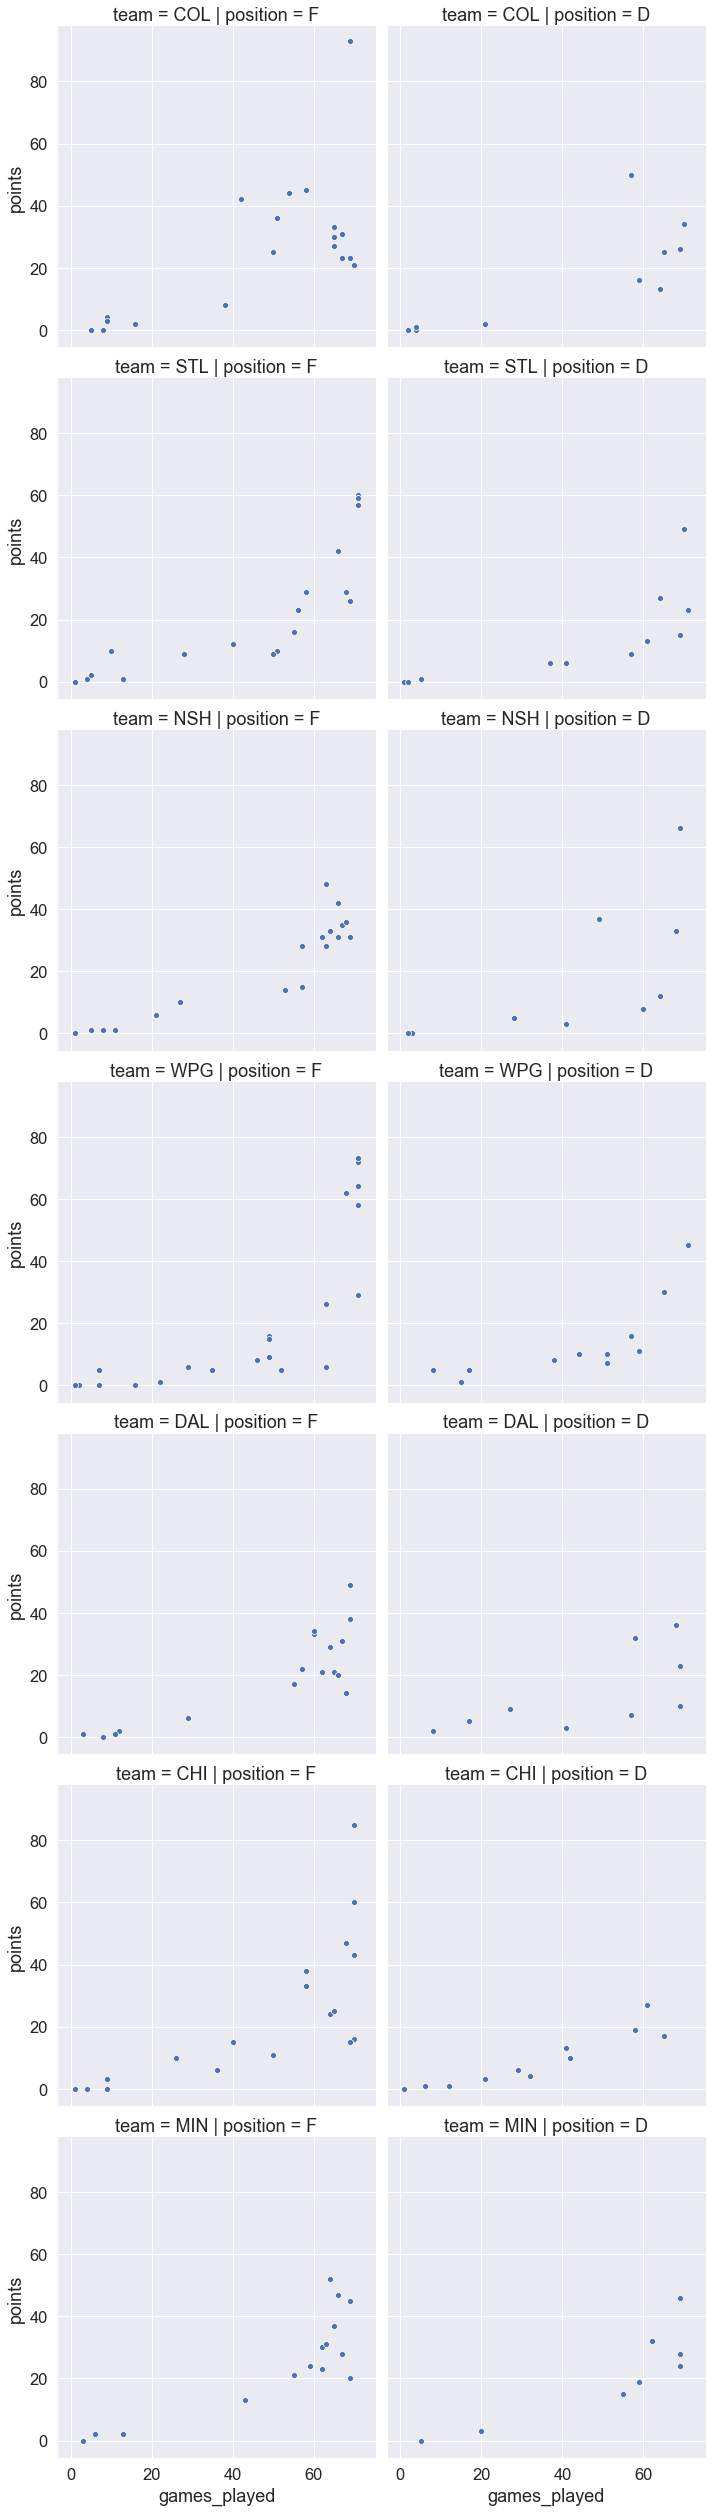

In [16]:
h = sns.relplot(data = central2, x = 'games_played', y = 'points', col = 'position', row = 'team')
h.savefig('pics/columns.png')

# Boxplot -- sns.catplot()

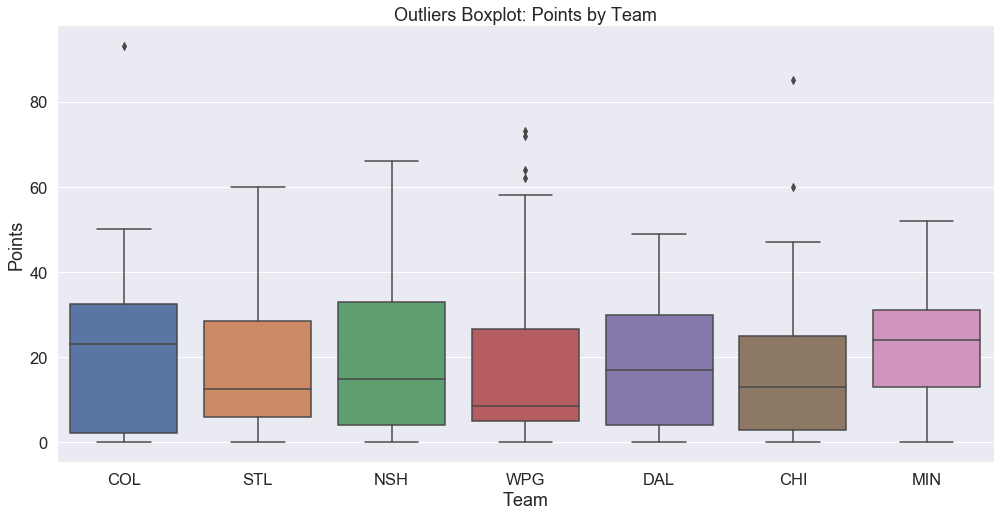

In [17]:
f = sns.catplot(data = central2, x = 'team', y = 'points', kind = 'box', height = 7, aspect = 2)
f.set(xlabel = 'Team', ylabel = 'Points', title = 'Outliers Boxplot: Points by Team');

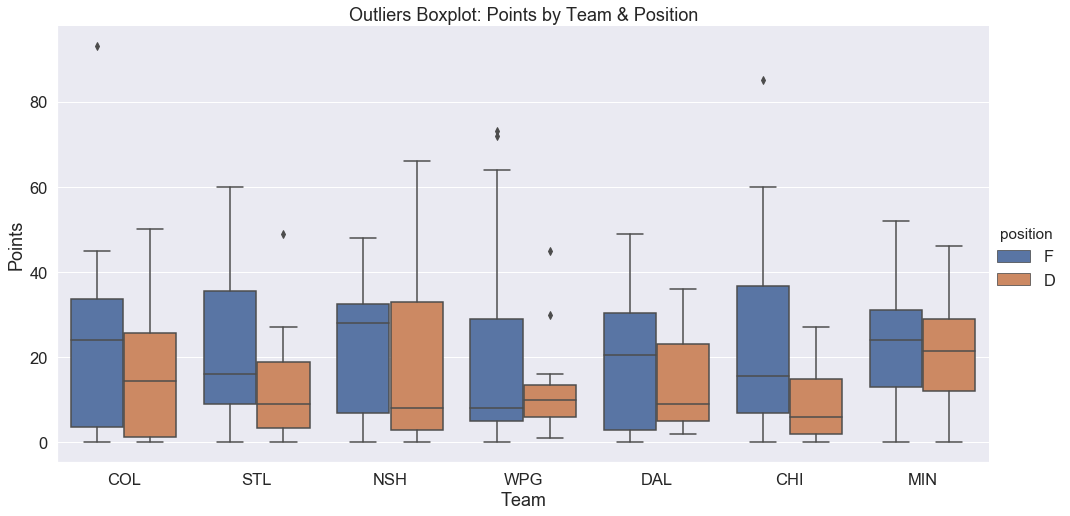

In [18]:
f2 = sns.catplot(data = central2, x = 'team', y = 'points', hue = 'position', kind = 'box', height = 7, aspect = 2)
f2.set(xlabel = 'Team', ylabel = 'Points', title = 'Outliers Boxplot: Points by Team & Position');

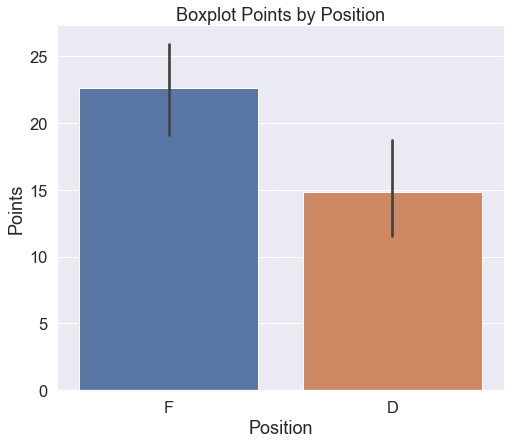

In [14]:
b = sns.catplot(data = central2, x = 'position', y = 'points', kind = 'bar', height = 6, aspect = 1.2)
b.set(xlabel = 'Position', ylabel = 'Points', title = 'Boxplot Points by Position');

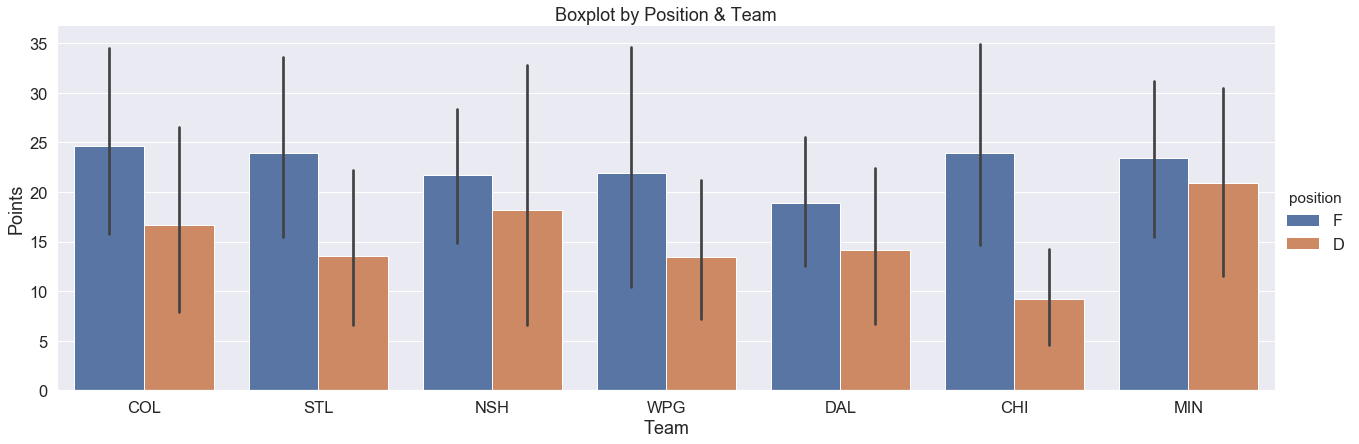

In [15]:
b2 = sns.catplot(data = central2, x = 'team', y = 'points', hue = 'position', height = 6, kind = 'bar', aspect = 3)
b2.set(xlabel = 'Team', ylabel = 'Points', title = 'Boxplot by Position & Team');

# Violin Plot

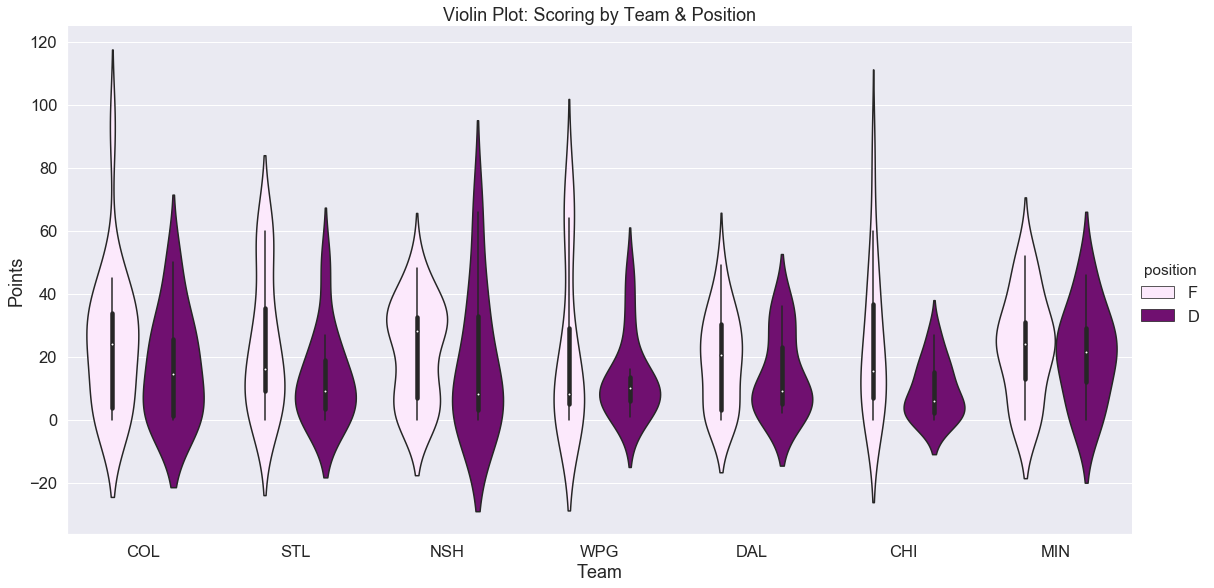

In [16]:
b = sns.catplot(x = 'team', y = 'points', kind = 'violin', data = central2, hue = 'position', height = 8, aspect = 2, color = 'purple')
b.set(xlabel = 'Team', ylabel = 'Points', title = 'Violin Plot: Scoring by Team & Position');

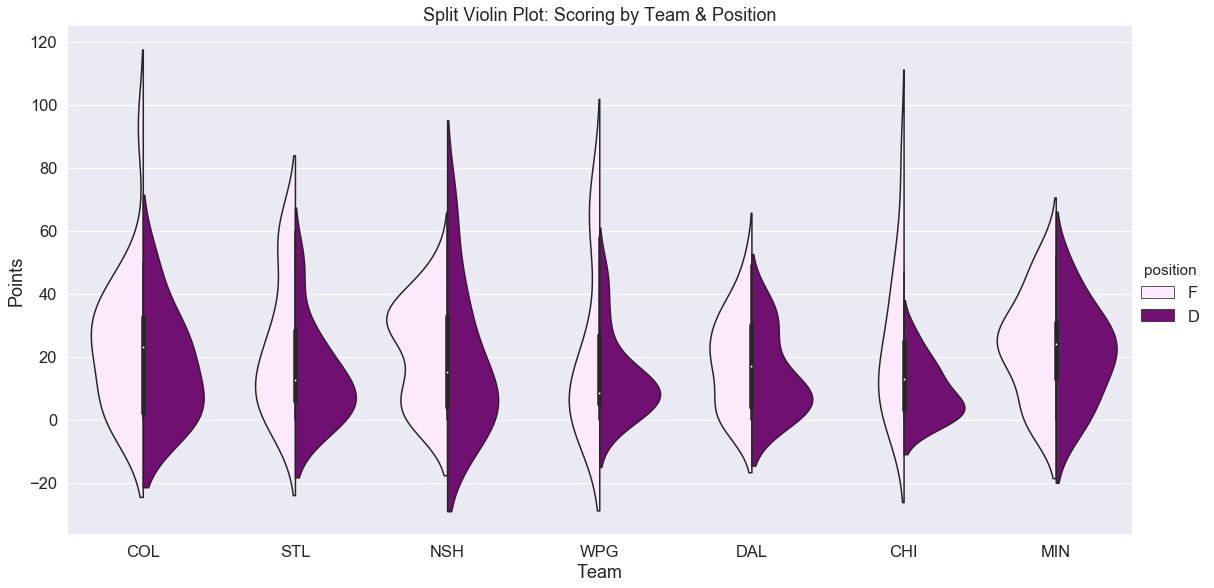

In [17]:
b = sns.catplot(x = 'team', y = 'points', kind = 'violin', data = central2, hue = 'position', 
                height = 8, aspect = 2, color = 'purple', split = True)
b.set(xlabel = 'Team', ylabel = 'Points', title = 'Split Violin Plot: Scoring by Team & Position');

# Pointplot 

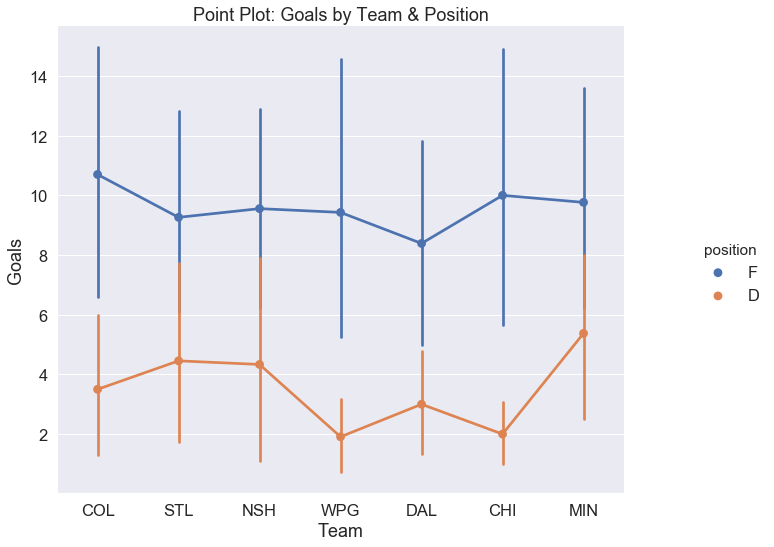

In [18]:
p = sns.catplot(x = 'team', y = 'goals', hue = 'position', kind = 'point', data = central2)
p.set(xlabel = 'Team', ylabel = 'Goals', title = 'Point Plot: Goals by Team & Position')
p.fig.set_size_inches([12,8])

# Swarm Plot 

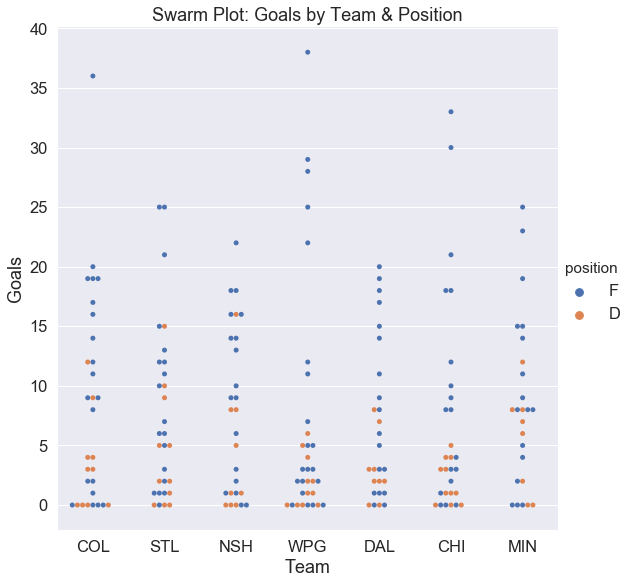

In [19]:
c = sns.catplot(x = 'team', y = 'goals', hue = 'position', kind = 'swarm', data = central2,
                height = 8, aspect = 1)
c.set(xlabel = 'Team', ylabel = 'Goals', title = 'Swarm Plot: Goals by Team & Position');

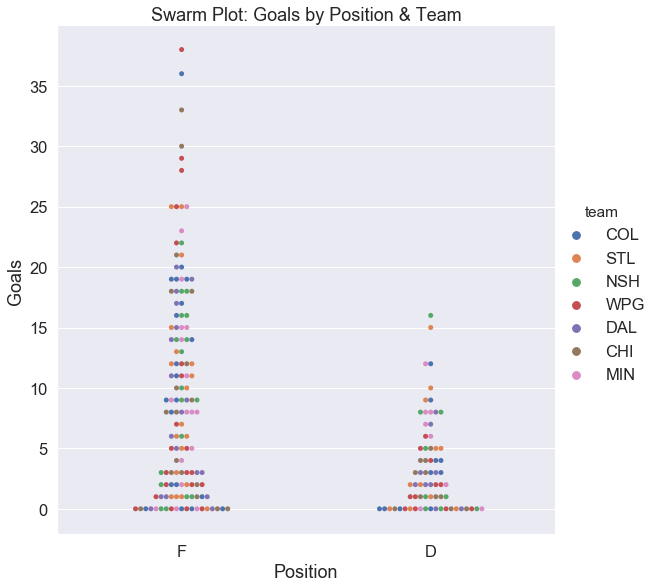

In [20]:
d = sns.catplot(x = 'position', y = 'goals', hue = 'team', kind = 'swarm', data = central2, height = 8, aspect = 1)
d.set(xlabel = 'Position', ylabel = 'Goals', title = 'Swarm Plot: Goals by Position & Team');

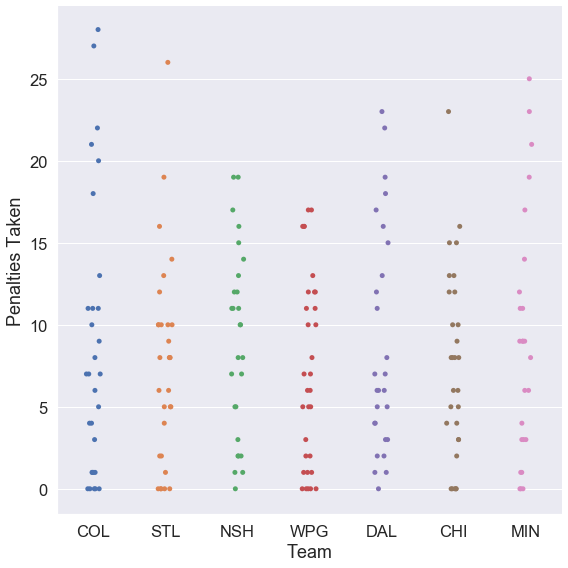

In [21]:
t = sns.catplot(data = central, y = 'penalties', x = 'team', height = 8, aspect = 1)
t.set(xlabel = 'Team', ylabel = 'Penalties Taken', title = '')

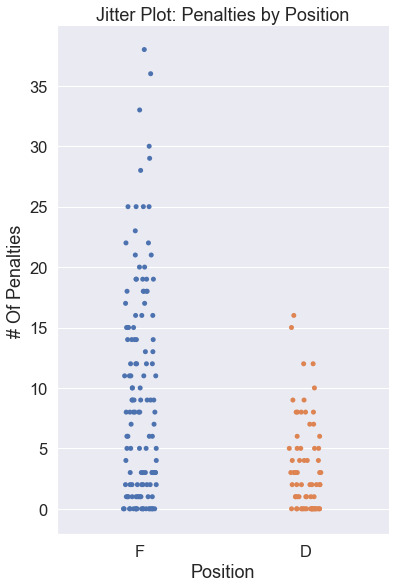

In [22]:
t = sns.catplot(data = central2, y = 'goals', x = 'position', height = 8, aspect = 0.7, jitter = True)
t.set(xlabel = 'Position', ylabel = '# Of Penalties', title = 'Jitter Plot: Penalties by Position');

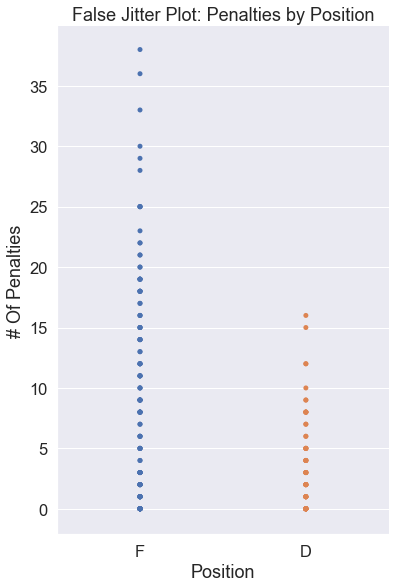

In [23]:
t = sns.catplot(data = central2, y = 'goals', x = 'position', height = 8, aspect = 0.7, jitter = False)
t.set(xlabel = 'Position', ylabel = '# Of Penalties', title = 'False Jitter Plot: Penalties by Position');

# Univariate Distributions

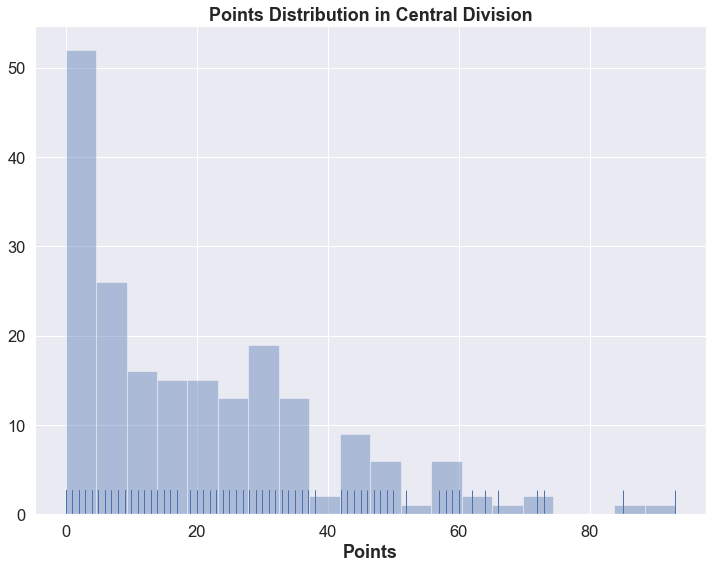

In [24]:
plt.figure(figsize = (10,8))
h = sns.distplot(central2.points, bins = 20, rug = True, kde = False)
h.set_xlabel('Points', fontweight = 'bold')
h.set_title('Points Distribution in Central Division', fontweight = 'bold')
plt.tight_layout()

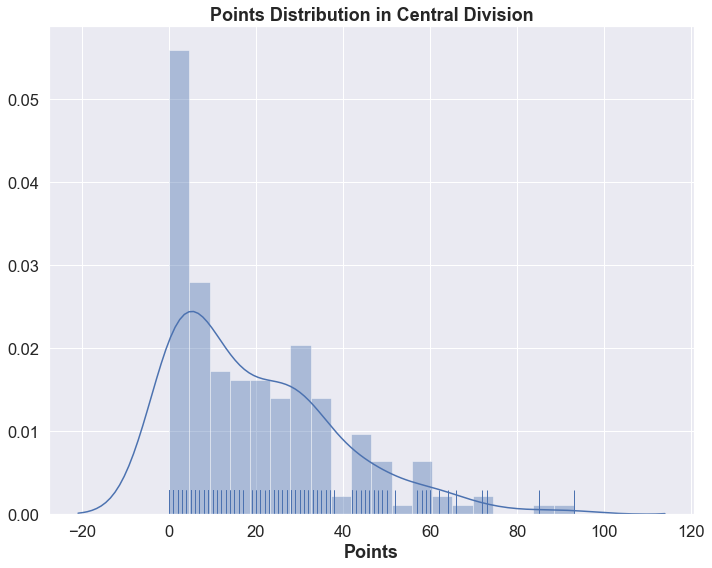

In [25]:
plt.figure(figsize = (10,8))
h = sns.distplot(central2.points, bins = 20, rug = True, kde = True)
h.set_xlabel('Points', fontweight = 'bold')
h.set_title('Points Distribution in Central Division', fontweight = 'bold')
plt.tight_layout()

# Jointplot

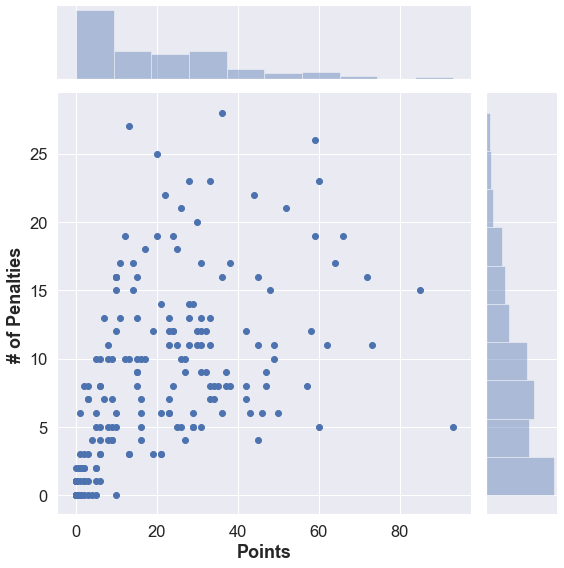

In [27]:
j = sns.jointplot(x = 'points', y = 'penalties', data = central2, height = 8)
j.set_axis_labels('Points', ylabel = '# of Penalties', fontweight = 'bold');

# Hexplot

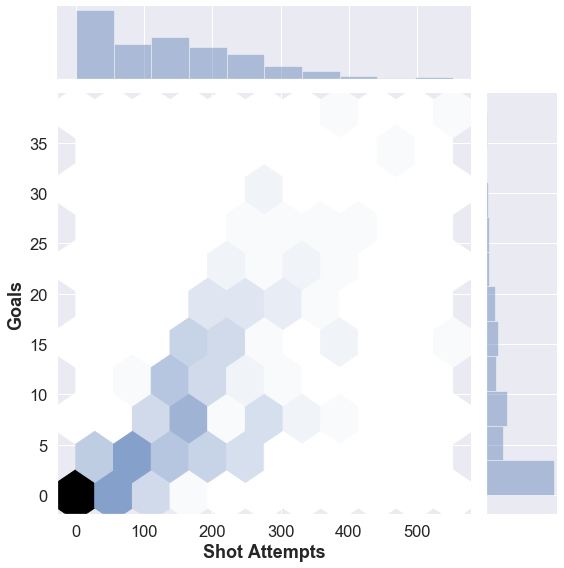

In [28]:
h = sns.jointplot(data = central2, x = 'shotattempts', y = 'goals', kind = 'hex', height = 8)
h.ax_joint.set_xlabel('Shot Attempts', fontweight='bold')
h.ax_joint.set_ylabel('Goals', fontweight = 'bold');

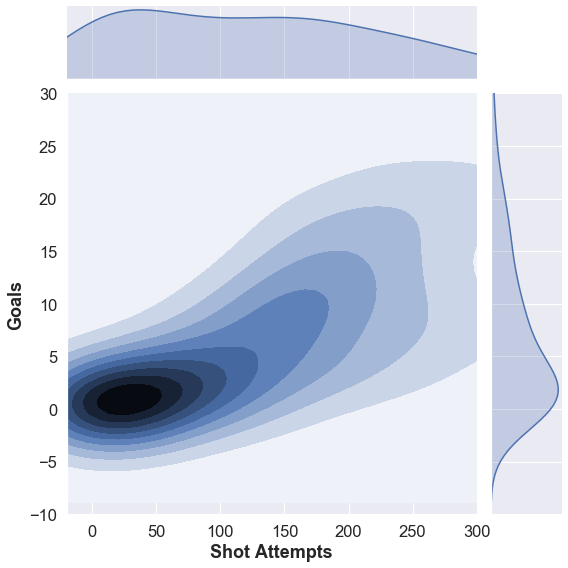

In [39]:
y = sns.jointplot(x = 'shotattempts', y = 'goals', kind = 'kde', data = central2, height = 8,
                  xlim = (-20, 300), ylim = (-10, 30))
y.ax_joint.set_xlabel('Shot Attempts', fontweight = 'bold')
y.ax_joint.set_ylabel('Goals', fontweight = 'bold');

# Correlations

In [40]:
df_corr = central2[['points', 'goals', 'penalties', 'hits', 'shotsongoal', 'shotattempts','icetime']]
corr = df_corr.corr()

In [41]:
corr

,points,goals,penalties,hits,shotsongoal,shotattempts,icetime
points,1.000000,0.912057,0.532431,0.242708,0.923925,0.899956,0.802878
goals,0.912057,1.000000,0.474330,0.209995,0.858738,0.800049,0.640466
penalties,0.532431,0.474330,1.000000,0.600213,0.591918,0.607948,0.667228
hits,0.242708,0.209995,0.600213,1.000000,0.359833,0.376050,0.496136
shotsongoal,0.923925,0.858738,0.591918,0.359833,1.000000,0.983847,0.867674
shotattempts,0.899956,0.800049,0.607948,0.376050,0.983847,1.000000,0.896480
icetime,0.802878,0.640466,0.667228,0.496136,0.867674,0.896480,1.000000


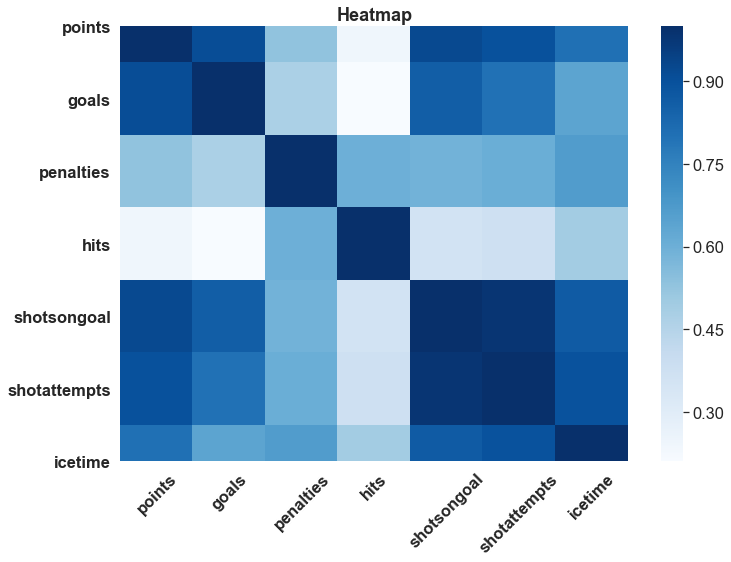

In [31]:
f, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(corr, square = True, cmap = 'Blues');
plt.yticks(fontweight = 'bold')
plt.xticks(rotation = 45, fontweight = 'bold')
plt.title('Heatmap', fontweight = 'bold')
plt.show()

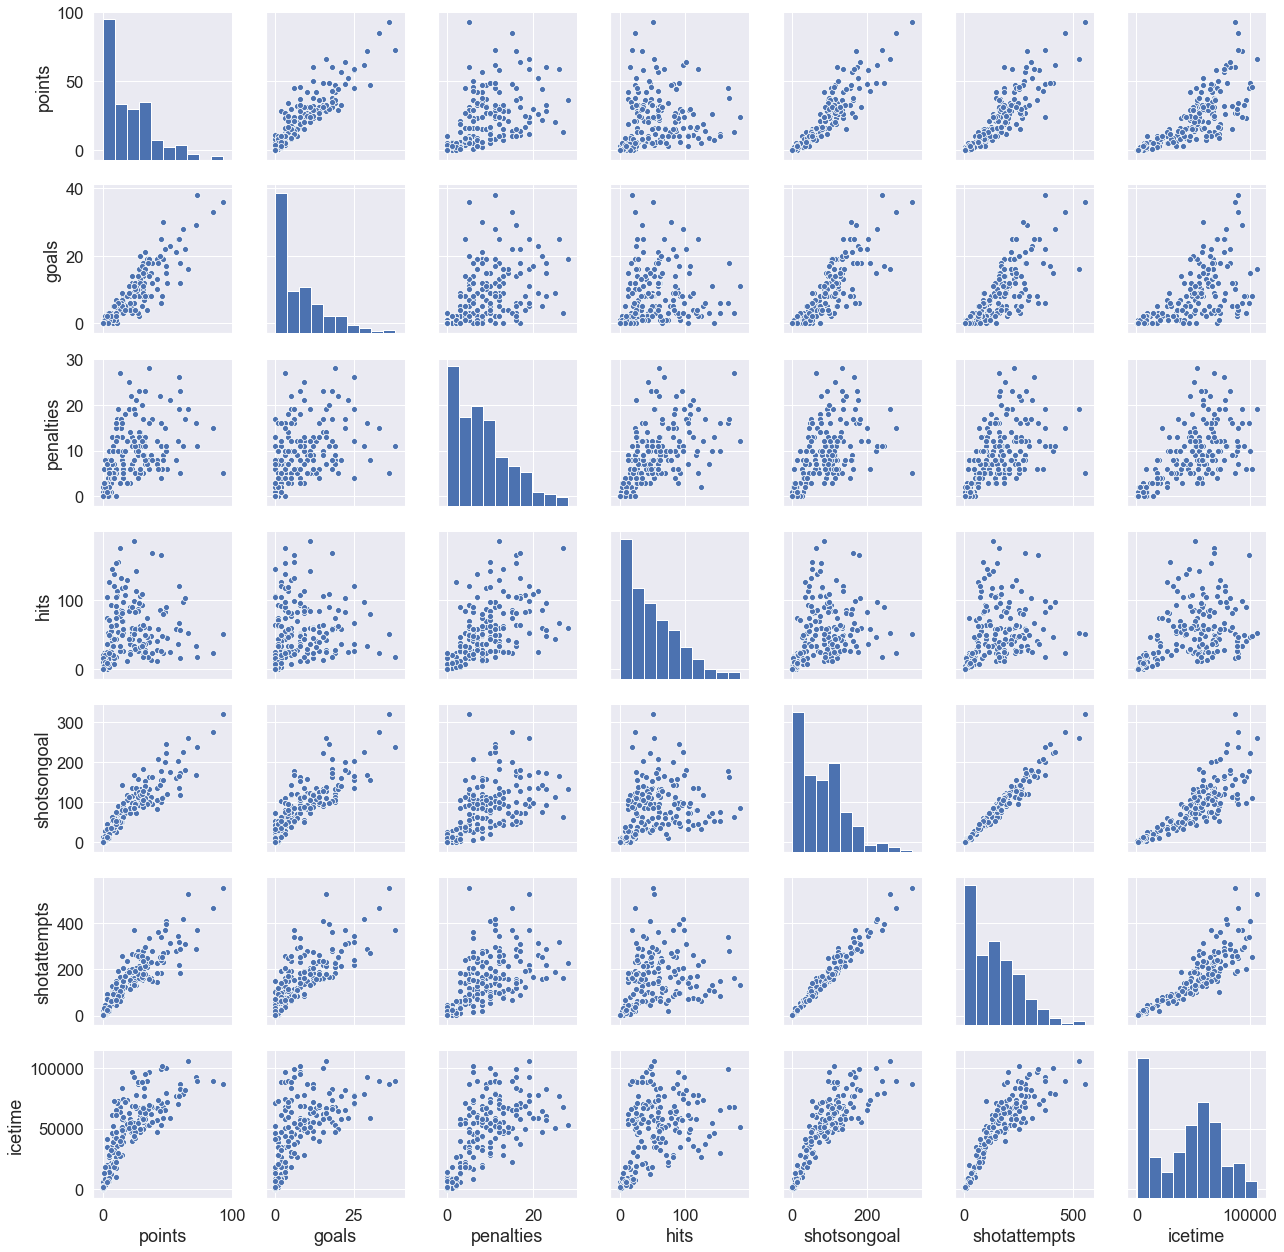

In [32]:
sns.pairplot(data = df_corr);